In [45]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from datetime import datetime
from operator import attrgetter

1. Sebelum melakukan analisis, tampilkan dataset store_bike.csv! Di dalamnya ada kolom
'transaction_date' berisi tanggal transaksi, ubah tipe datanya dari object menjadi datetime!
Kemudian hapus semua baris yang memiliki missing value dari dataframe!

In [46]:
# df = pd.read_csv('store_bike.csv')      
# df.head()

In [47]:
# df['transaction_date'].str.split('/',expand=True)[[2,1,0]]

In [48]:
df = pd.read_csv('store_bike.csv',
                 infer_datetime_format=True, 
                 parse_dates=['transaction_date'],  
                 dtype={'transaction_id':str, 'product_id':str, 'customer_id':str })      
df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,$53.62,41245.0
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,$388.92,41701.0
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,$248.82,36361.0
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,$381.10,36145.0
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,$709.48,42226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,True,Approved,OHM Cycles,Standard,high,medium,2005.66,"$1,203.40",37823.0
19996,19997,41,127,2017-11-09,True,Approved,Solex,Road,medium,medium,416.98,$312.74,35560.0
19997,19998,87,2284,2017-04-14,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,$44.71,40410.0
19998,19999,6,2764,2017-07-03,False,Approved,OHM Cycles,Standard,high,medium,227.88,$136.73,38216.0


In [49]:
df.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [50]:
df_missing = df.dropna()
df_missing

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,$53.62,41245.0
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,$388.92,41701.0
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,$248.82,36361.0
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,$381.10,36145.0
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,$709.48,42226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,True,Approved,OHM Cycles,Standard,high,medium,2005.66,"$1,203.40",37823.0
19996,19997,41,127,2017-11-09,True,Approved,Solex,Road,medium,medium,416.98,$312.74,35560.0
19997,19998,87,2284,2017-04-14,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,$44.71,40410.0
19998,19999,6,2764,2017-07-03,False,Approved,OHM Cycles,Standard,high,medium,227.88,$136.73,38216.0


In [51]:
df_missing.isna().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

In [52]:
df_missing['order_status'].value_counts()

Approved     19273
Cancelled      172
Name: order_status, dtype: int64

In [53]:
df_clean = df_missing[df_missing['order_status'] != 'Cancelled']
df_clean.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,$53.62,41245.0
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,$388.92,41701.0
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,$248.82,36361.0
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,$381.10,36145.0
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,$709.48,42226.0


In [54]:
len(df_clean)

19273

---
## no 2

Departement marketing meminta Anda untuk membuat analisis perilaku customer selama
tahun 2017. Coba buatlah cohort analysis berdasarkan data yang diberikan. Bagaimana perilaku
customer BikeStore selama tahun 2017?

In [55]:
df_clean['customer_id'].value_counts()

2476    14
1068    14
2183    14
1913    13
2912    13
        ..
3179     1
1865     1
1544     1
3392     1
71       1
Name: customer_id, Length: 3490, dtype: int64

In [56]:
df_cohort = df_clean[['transaction_date', 'customer_id']].copy()
df_cohort 

,transaction_date,customer_id
0,2017-02-25,2950
1,2017-05-21,3120
2,2017-10-16,402
3,2017-08-31,3135
4,2017-10-01,787
...,...,...
19995,2017-06-24,1018
19996,2017-11-09,127
19997,2017-04-14,2284
19998,2017-07-03,2764


In [57]:
df_cohort['cohort_month'] = df_cohort.groupby('customer_id')['transaction_date'].transform('min')
df_cohort

,transaction_date,customer_id,cohort_month
0,2017-02-25,2950,2017-02-25
1,2017-05-21,3120,2017-01-20
2,2017-10-16,402,2017-01-29
3,2017-08-31,3135,2017-02-08
4,2017-10-01,787,2017-01-24
...,...,...,...
19995,2017-06-24,1018,2017-01-25
19996,2017-11-09,127,2017-01-03
19997,2017-04-14,2284,2017-04-06
19998,2017-07-03,2764,2017-02-27


In [58]:
len(df_cohort[df_cohort['customer_id']=='127'])

10

In [59]:
df_cohort['cohort_month'] = df_cohort['cohort_month'].dt.to_period('M')
df_cohort

,transaction_date,customer_id,cohort_month
0,2017-02-25,2950,2017-02
1,2017-05-21,3120,2017-01
2,2017-10-16,402,2017-01
3,2017-08-31,3135,2017-02
4,2017-10-01,787,2017-01
...,...,...,...
19995,2017-06-24,1018,2017-01
19996,2017-11-09,127,2017-01
19997,2017-04-14,2284,2017-04
19998,2017-07-03,2764,2017-02


### 2. current order month
berisis bulan apa saja seorang customer melakukan taransaksi

In [60]:
df_cohort['current_order_month'] = df_cohort['transaction_date'].dt.to_period('M')
df_cohort

,transaction_date,customer_id,cohort_month,current_order_month
0,2017-02-25,2950,2017-02,2017-02
1,2017-05-21,3120,2017-01,2017-05
2,2017-10-16,402,2017-01,2017-10
3,2017-08-31,3135,2017-02,2017-08
4,2017-10-01,787,2017-01,2017-10
...,...,...,...,...
19995,2017-06-24,1018,2017-01,2017-06
19996,2017-11-09,127,2017-01,2017-11
19997,2017-04-14,2284,2017-04,2017-04
19998,2017-07-03,2764,2017-02,2017-07


### 3. n_custemer
jumlah uniq customer 'cohort _mont' dan'current order mont'

In [61]:
df_cohort = df_cohort.groupby(by=['cohort_month','current_order_month'])[['customer_id']].nunique().reset_index()

df_cohort = df_cohort.rename(columns={'customer_id':'n_customers'})

df_cohort

,cohort_month,current_order_month,n_customers
0,2017-01,2017-01,1315
1,2017-01,2017-02,461
2,2017-01,2017-03,475
3,2017-01,2017-04,474
4,2017-01,2017-05,470
...,...,...,...
73,2017-10,2017-11,6
74,2017-10,2017-12,7
75,2017-11,2017-11,15
76,2017-11,2017-12,6


In [67]:
df_cohort.to_excel('df_coba_file.xlsx', index=False)

### 4. periode_number

In [62]:
df_cohort['Periode_number'] =  df_cohort['current_order_month'] - df_cohort['cohort_month']
df_cohort

,cohort_month,current_order_month,n_customers,Periode_number
0,2017-01,2017-01,1315,<0 * MonthEnds>
1,2017-01,2017-02,461,<MonthEnd>
2,2017-01,2017-03,475,<2 * MonthEnds>
3,2017-01,2017-04,474,<3 * MonthEnds>
4,2017-01,2017-05,470,<4 * MonthEnds>
...,...,...,...,...
73,2017-10,2017-11,6,<MonthEnd>
74,2017-10,2017-12,7,<2 * MonthEnds>
75,2017-11,2017-11,15,<0 * MonthEnds>
76,2017-11,2017-12,6,<MonthEnd>


In [63]:
df_cohort['Periode_number'] = df_cohort['Periode_number'].apply(attrgetter('n'))
df_cohort

,cohort_month,current_order_month,n_customers,Periode_number
0,2017-01,2017-01,1315,0
1,2017-01,2017-02,461,1
2,2017-01,2017-03,475,2
3,2017-01,2017-04,474,3
4,2017-01,2017-05,470,4
...,...,...,...,...
73,2017-10,2017-11,6,1
74,2017-10,2017-12,7,2
75,2017-11,2017-11,15,0
76,2017-11,2017-12,6,1


In [74]:
df_cohort_pivot = df_cohort.pivot_table(
    index='cohort_month',
    columns='Periode_number',
    values='n_customers'
)

df_cohort_pivot

Periode_number,0,1,2,3,4,5,6,7,8,9,10,11
cohort_month,,,,,,,,,,,,
2017-01,1315.0,461.0,475.0,474.0,470.0,455.0,488.0,498.0,469.0,496.0,466.0,489.0
2017-02,794.0,307.0,290.0,304.0,272.0,290.0,301.0,275.0,319.0,295.0,278.0,NaN
2017-03,489.0,168.0,169.0,162.0,177.0,183.0,168.0,203.0,181.0,185.0,NaN,NaN
2017-04,342.0,109.0,120.0,155.0,141.0,120.0,143.0,124.0,131.0,NaN,NaN,NaN
2017-05,217.0,88.0,78.0,87.0,72.0,72.0,73.0,83.0,NaN,NaN,NaN,NaN
2017-06,127.0,48.0,45.0,51.0,48.0,46.0,52.0,NaN,NaN,NaN,NaN,NaN
2017-07,84.0,30.0,28.0,33.0,39.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,54.0,17.0,24.0,19.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,26.0,8.0,8.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
df_cohort_pivot.div(df_cohort_pivot[0],axis=0)

Periode_number,0,1,2,3,4,5,6,7,8,9,10,11
cohort_month,,,,,,,,,,,,
2017-01,1.0,0.350570,0.361217,0.360456,0.357414,0.346008,0.371103,0.378707,0.356654,0.377186,0.354373,0.371863
2017-02,1.0,0.386650,0.365239,0.382872,0.342569,0.365239,0.379093,0.346348,0.401763,0.371537,0.350126,NaN
2017-03,1.0,0.343558,0.345603,0.331288,0.361963,0.374233,0.343558,0.415133,0.370143,0.378323,NaN,NaN
2017-04,1.0,0.318713,0.350877,0.453216,0.412281,0.350877,0.418129,0.362573,0.383041,NaN,NaN,NaN
2017-05,1.0,0.405530,0.359447,0.400922,0.331797,0.331797,0.336406,0.382488,NaN,NaN,NaN,NaN
2017-06,1.0,0.377953,0.354331,0.401575,0.377953,0.362205,0.409449,NaN,NaN,NaN,NaN,NaN
2017-07,1.0,0.357143,0.333333,0.392857,0.464286,0.297619,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,1.0,0.314815,0.444444,0.351852,0.277778,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,1.0,0.307692,0.307692,0.346154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
df_cohort_persen = (df_cohort_pivot.div(df_cohort_pivot[0], axis=0)*100).round(2)
df_cohort_persen

Periode_number,0,1,2,3,4,5,6,7,8,9,10,11
cohort_month,,,,,,,,,,,,
2017-01,100.0,35.06,36.12,36.05,35.74,34.60,37.11,37.87,35.67,37.72,35.44,37.19
2017-02,100.0,38.66,36.52,38.29,34.26,36.52,37.91,34.63,40.18,37.15,35.01,NaN
2017-03,100.0,34.36,34.56,33.13,36.20,37.42,34.36,41.51,37.01,37.83,NaN,NaN
2017-04,100.0,31.87,35.09,45.32,41.23,35.09,41.81,36.26,38.30,NaN,NaN,NaN
2017-05,100.0,40.55,35.94,40.09,33.18,33.18,33.64,38.25,NaN,NaN,NaN,NaN
2017-06,100.0,37.80,35.43,40.16,37.80,36.22,40.94,NaN,NaN,NaN,NaN,NaN
2017-07,100.0,35.71,33.33,39.29,46.43,29.76,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,100.0,31.48,44.44,35.19,27.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,100.0,30.77,30.77,34.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Monthly Customers Retention Cohort 2011')

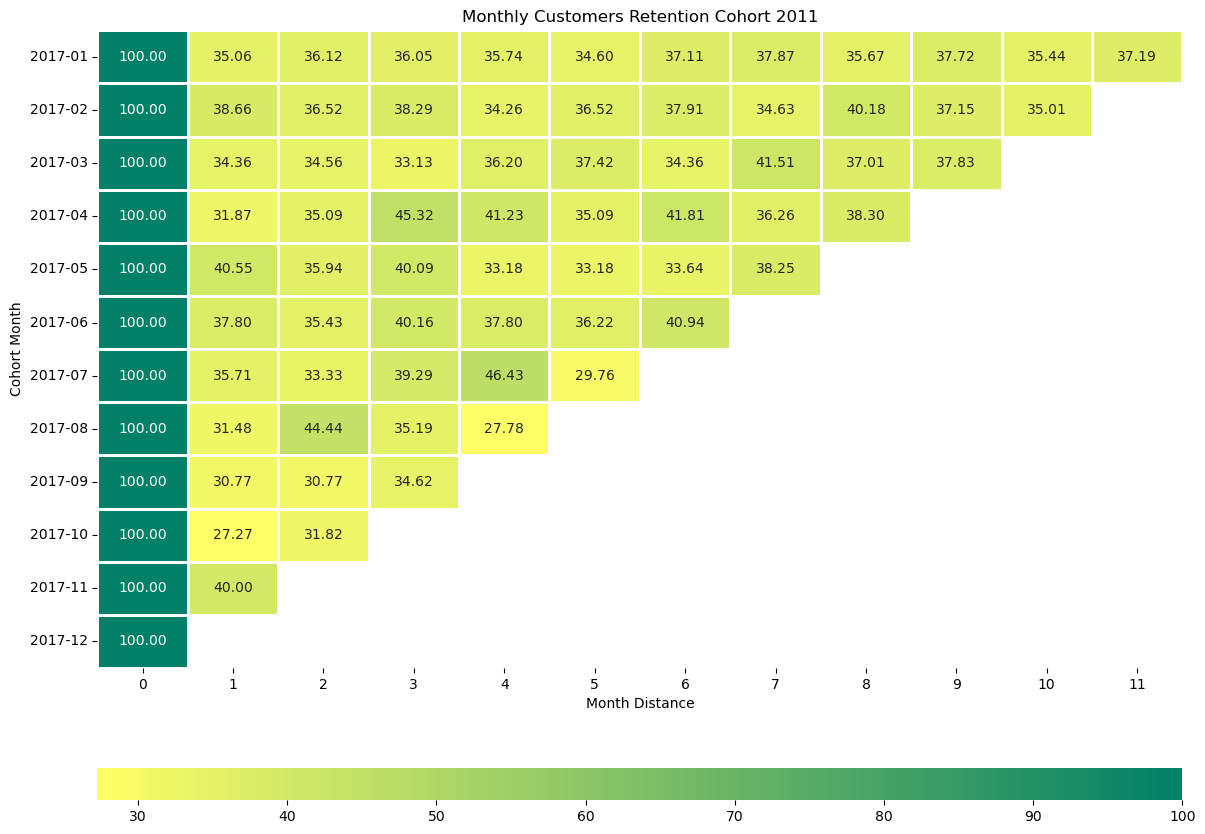

In [66]:
grid_kw = {
    'height_ratios': (20,1),        # perbandingan tinggi subplot
    'hspace': 0.3                   # jarak antar subplot
}

fig, (ax_top, ax_bottom) = plt.subplots(nrows=2, ncols=1, figsize=(14,10), gridspec_kw=grid_kw)

sns.heatmap(
    data= df_cohort_persen,
    ax= ax_top,                                 # axis dari heatmap
    cbar_ax= ax_bottom,                         # axis dari color bar
    cbar_kws= {'orientation':'horizontal'},     # customize color bar
    annot= True,                                # menampilkan label/anotasi
    fmt= '.2f',                                 # format anotasi 2 digit decimal
    cmap= 'summer_r',                             # palette warna
    linewidths= 2                               # border antar cell
)


ax_top.set_xlabel('Month Distance') 
ax_top.set_ylabel('Cohort Month')
ax_top.set_title('Monthly Customers Retention Cohort 2011') 